In [3]:
# Install packages
install.packages("fastDummies")
install.packages("tfhub")

Warning message:
"package 'fastDummies' is in use and will not be installed"

package 'tfhub' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\alif-\AppData\Local\Temp\Rtmpw7cuq7\downloaded_packages


In [9]:
# Import libraries
library(keras)
library(EBImage)
library(tidyverse)
library(keras)
library(fastDummies)
library(caret)
library(tensorflow)
library(tfhub)

Warning message:
"package 'keras' was built under R version 3.6.3"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::combine()   masks EBImage::combine()
x dplyr::filter()    masks stats::filter()
x dplyr::lag()       masks stats::lag()
x purrr::transpose() masks EBImage::transpose()
Warning message:
"package 'fastDummies' was built under R version 3.6.3"Loading required package: lattice

Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift




In [11]:
# Read train file names
setwd("C:\\Users\\alif-\\Projects\\r-tensorflow\\melanoma-classification\\images_subset")
file_list <- list.files(path="C:\\Users\\alif-\\Projects\\r-tensorflow\\melanoma-classification\\images_subset")

In [12]:
# Read, resize, and unroll train images into vectors
melanoma_pic <- list()
for (i in 1:length(file_list)) {melanoma_pic[[i]] <- readImage(file_list[i])}
for (i in 1:length(file_list)) {melanoma_pic[[i]] <- resize(melanoma_pic[[i]], 28, 28)}
for (i in 1:length(file_list)) {melanoma_pic[[i]] <- array_reshape(melanoma_pic[[i]], c(28, 28, 3))}

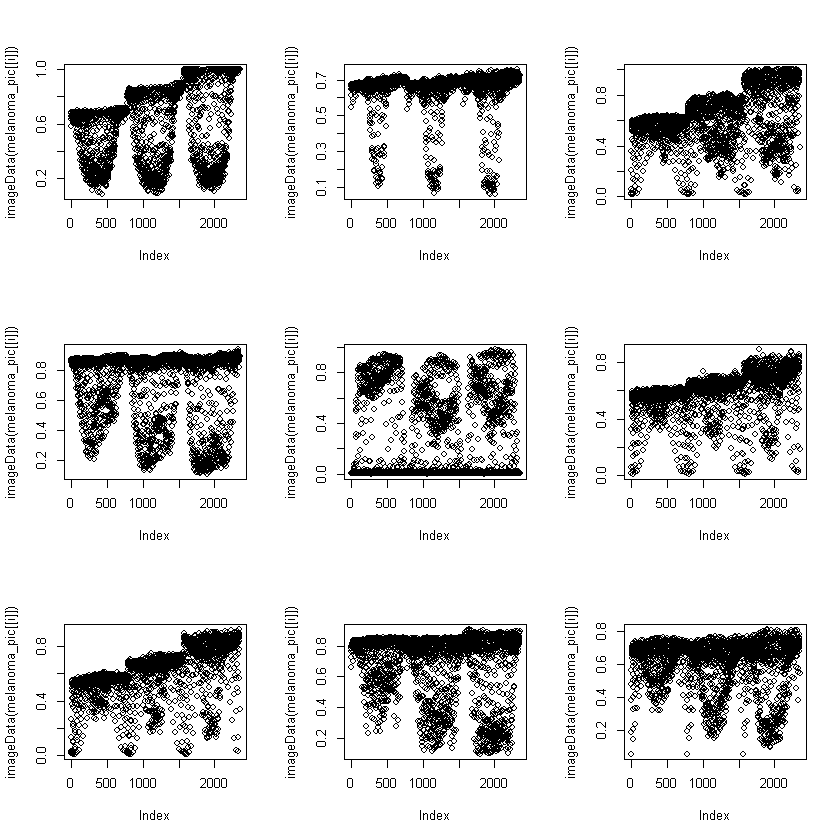

In [20]:
par(mfrow = c(3,3))
for (i in 1:9) plot(imageData(melanoma_pic[[i]]))

In [26]:
# Row bind train images
train_x <- NULL
for (i in 1:length(file_list)) {train_x <- rbind(train_x, melanoma_pic[[i]])}

In [1]:
# Read test file names
setwd("C:\\Users\\alif-\\Projects\\r-tensorflow\\melanoma-classification\\test_images_subset")
test_file_list <- list.files(path="C:\\Users\\alif-\\Projects\\r-tensorflow\\melanoma-classification\\test_images_subset")

In [35]:
# Read, resize, and unroll test images into vectors
test_melanoma_pic <- list()
for (i in 1:length(test_file_list)) {test_melanoma_pic[[i]] <- readImage(test_file_list[i])}
for (i in 1:length(test_file_list)) {test_melanoma_pic[[i]] <- resize(test_melanoma_pic[[i]], 28, 28)}
for (i in 1:length(test_file_list)) {test_melanoma_pic[[i]] <- array_reshape(test_melanoma_pic[[i]], c(28, 28, 3))}

In [63]:
# Row bind test images
test_x <- NULL
for (i in 1:length(test_file_list)) {test_x <- rbind(test_x, test_melanoma_pic[[i]])}

In [13]:
# Read csv file and remove first col
setwd("C:\\Users\\alif-\\Projects\\r-tensorflow\\melanoma-classification")
raw_labels <- read.csv('labels_subset.csv')
dummy = dummy_cols(raw_labels,remove_first_dummy = TRUE)

In [61]:
# Extract ground truth labels for train and test
train_y = dummy[1:153,2]
test_y = dummy[203:230,2]

In [62]:
# One hot encoding for train and test
train_labels <- to_categorical(train_y)
test_labels <- to_categorical(test_y)

In [64]:
# Create model
model <- keras_model_sequential()
model %>%
  layer_dense(units=256, activation = "relu", input_shape = c(2352)) %>%
  layer_dense(units=128, activation = "relu") %>%
  layer_dense(units=2, activation = "softmax")
summary(model)

Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense (Dense)                       (None, 256)                     602368      
________________________________________________________________________________
dense_1 (Dense)                     (None, 128)                     32896       
________________________________________________________________________________
dense_2 (Dense)                     (None, 2)                       258         
Total params: 635,522
Trainable params: 635,522
Non-trainable params: 0
________________________________________________________________________________


In [65]:
# Compile model
model %>%
  compile(loss = "binary_crossentropy",
          optimize = optimizer_rmsprop(),
          metrics = c("accuracy"))

In [66]:
# Track model history
history <- model %>%
  fit(train_x, train_labels, epochs = 30, batch_size = 32,
      validation_split = 0.2)

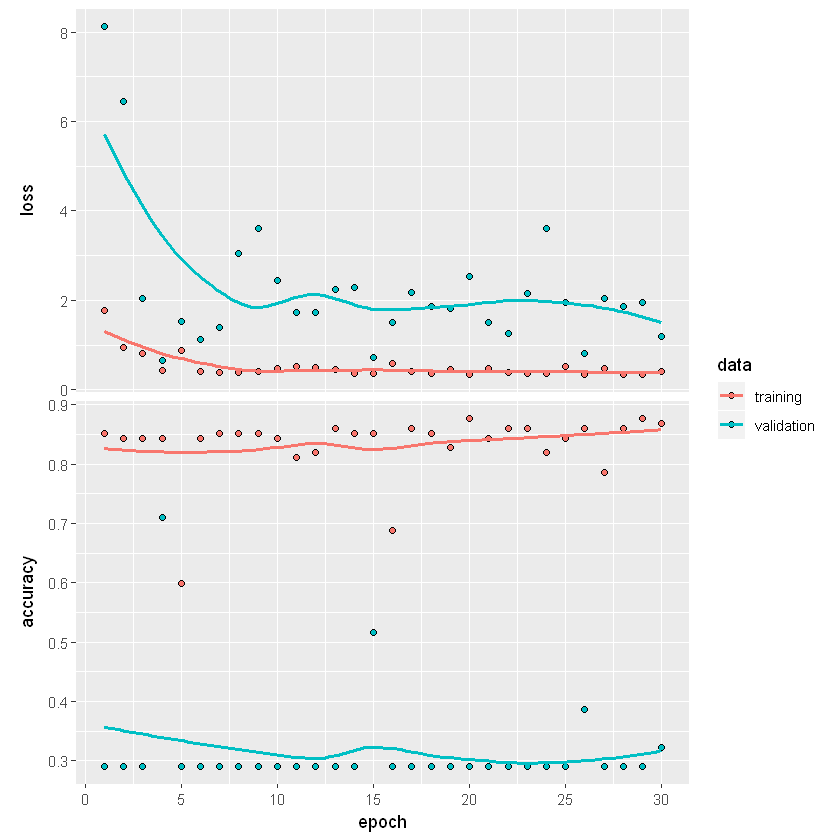

In [67]:
# Plot model loss and accuracy
plot(history)

In [ ]:
# Try NASNet
layer_nasnet <- layer_hub(
  handle = "https://tfhub.dev/google/imagenet/nasnet_large/feature_vector/5"
)
input <- layer_input(shape = c(2352))
output <- layer_nasnet(input)
model <- keras_model(input, output)
summary(model)